In [2]:
import pandas as pd

In [3]:
df_housing = pd.read_csv('perth_housing.csv')

In [4]:
df_housing.head(3)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\n,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\n,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\n,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0


In [5]:
#Columns can be remove
#NEAREST_STN, 
#Postcode, Latitude, Longitude, NEAREST_SCH,nearest_sch_rank

In [6]:
# Columns by total null values
df_housing.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [7]:
df_housing.shape

(33656, 19)

In [8]:
## grouping data by NEAREST_SCH
df_housing.groupby(['NEAREST_SCH'])['NEAREST_SCH'].count()

NEAREST_SCH
ALKIMOS BAPTIST COLLEGE           358
ALL SAINTS' COLLEGE               127
ALTA-1                            282
APPLECROSS SENIOR HIGH SCHOOL     388
AQUINAS COLLEGE                   281
                                 ... 
WESLEY COLLEGE                     92
WILLETTON SENIOR HIGH SCHOOL       69
WOODVALE SECONDARY COLLEGE        104
YANCHEP SECONDARY COLLEGE         298
YOUTH FUTURES COMMUNITY SCHOOL    499
Name: NEAREST_SCH, Length: 160, dtype: int64

In [9]:
df_housing.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [10]:
#Creating dataframe from cols other than -  
#NEAREST_STN, 
#Postcode, Latitude, Longitude, NEAREST_SCH,nearest_sch_rank
df_housing = df_housing.drop(['NEAREST_STN', 'POSTCODE', 
                              'LATITUDE', 'LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_RANK'], axis=1)

In [11]:
df_housing.shape

(33656, 13)

In [12]:
##Deleting rows which are NaN in the dataframe
df_housing = df_housing.dropna()

In [13]:
df_housing.shape

(28256, 13)

In [14]:
##Checking for Null values in dataframe
df_housing.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
DATE_SOLD           0
NEAREST_SCH_DIST    0
dtype: int64

In [15]:
##Checking for numerical columns in dataframe
col_no_numerical = [cols for cols in df_housing.columns if df_housing[cols].dtype not in ['int64', 'float64']]

In [16]:
col_no_numerical

['ADDRESS', 'SUBURB', 'DATE_SOLD']

In [17]:
df_housing.groupby(['ADDRESS'], sort=True)['ADDRESS'].count()

ADDRESS
1 Acorn Place       1
1 Addis Way         1
1 Ainsley Court     1
1 Albert Street     1
1 Aman Place        1
                   ..
9C Gold Street      1
9D Shalford Way     1
9a Exley Close      1
9a Klem Road        1
9b Wesley Street    1
Name: ADDRESS, Length: 28207, dtype: int64

In [18]:
## Deleting ADDRESS column as it contains unique names
df_housing = df_housing.drop('ADDRESS', axis=1)

In [19]:
df_housing.groupby(['SUBURB'], sort=True)['SUBURB'].count()

SUBURB
Alexander Heights    107
Alfred Cove           95
Alkimos               88
Anketell              13
Applecross            69
                    ... 
Wooroloo              24
Wungong               12
Yanchep               83
Yangebup             102
Yokine                42
Name: SUBURB, Length: 317, dtype: int64

In [20]:
col_no_numerical = [cols for cols in df_housing.columns if df_housing[cols].dtype not in ['int64', 'float64']]

In [21]:
col_no_numerical

['SUBURB', 'DATE_SOLD']

In [23]:
df_housing.dtypes

SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN_DIST      int64
DATE_SOLD            object
NEAREST_SCH_DIST    float64
dtype: object

In [25]:
df_housing.head(3)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,NEAREST_SCH_DIST
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,1800,2018-09-01,0.828339
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,4900,2019-02-01,5.524324
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,1900,2015-06-01,1.649178


In [27]:
df_housing['SUBURB']

0             South Lake
1                  Wandi
2                Camillo
3               Bellevue
4              Lockridge
              ...       
33648        Aubin Grove
33649        Middle Swan
33650    South Fremantle
33651    South Fremantle
33654         Girrawheen
Name: SUBURB, Length: 28256, dtype: object

In [28]:
df_housing.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,NEAREST_SCH_DIST
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,1800,2018-09-01,0.828339
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,4900,2019-02-01,5.524324
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,1900,2015-06-01,1.649178
3,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,3600,2018-07-01,1.571401
4,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,2000,2016-11-01,1.514922


In [29]:
df_housing.columns

Index(['SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'DATE_SOLD',
       'NEAREST_SCH_DIST'],
      dtype='object')

### Visualisations for Data Cleaning

In [30]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### SUBURB Column

<AxesSubplot:xlabel='SUBURB', ylabel='PRICE'>

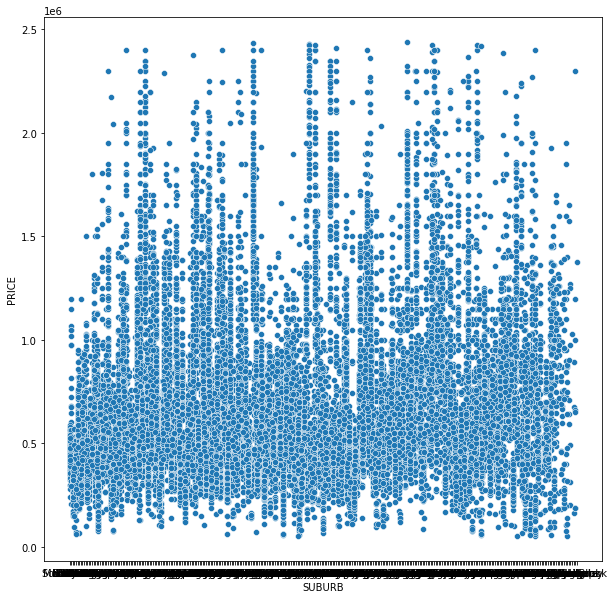

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_housing['SUBURB'], y=df_housing['PRICE'])

#### BEDROOMS Column

<AxesSubplot:xlabel='BEDROOMS', ylabel='PRICE'>

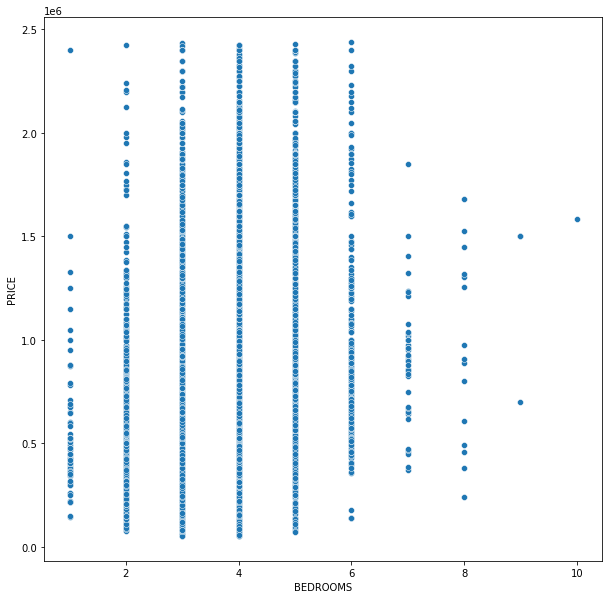

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_housing['BEDROOMS'], y=df_housing['PRICE'])

#### GARAGE column

<AxesSubplot:xlabel='GARAGE', ylabel='PRICE'>

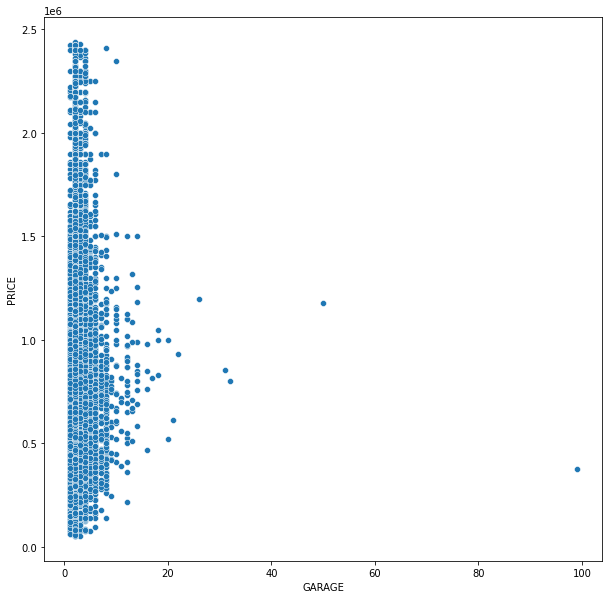

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_housing['GARAGE'], y=df_housing['PRICE'])

In [34]:
df_housing[df_housing['GARAGE'] > 20]

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,NEAREST_SCH_DIST
2122,Mardella,800000,4,2,32.0,5136,238,2004.0,41300,17300,2013-11-01,4.219643
11529,Mount Helena,615000,5,2,21.0,19370,171,1990.0,33500,18800,2018-12-01,2.765937
17286,Merriwa,375000,3,2,99.0,2916,126,2006.0,34700,3600,2015-04-01,0.728016
25632,Jandabup,1200000,4,2,26.0,42538,260,2009.0,22800,8900,2012-10-01,4.517886
28434,Cardup,930000,5,2,22.0,20083,344,1998.0,33800,10400,2016-10-01,3.380863
30286,Banjup,1180000,3,2,50.0,22367,257,1990.0,22600,4700,2019-09-01,3.188883
32789,Karnup,855000,5,2,31.0,30881,317,2009.0,49300,7100,2017-07-01,3.263658


In [35]:
greater_garage_idx = df_housing[df_housing['GARAGE'] > 20].index
df_housing.drop(greater_garage_idx, inplace=True)

<AxesSubplot:xlabel='GARAGE', ylabel='PRICE'>

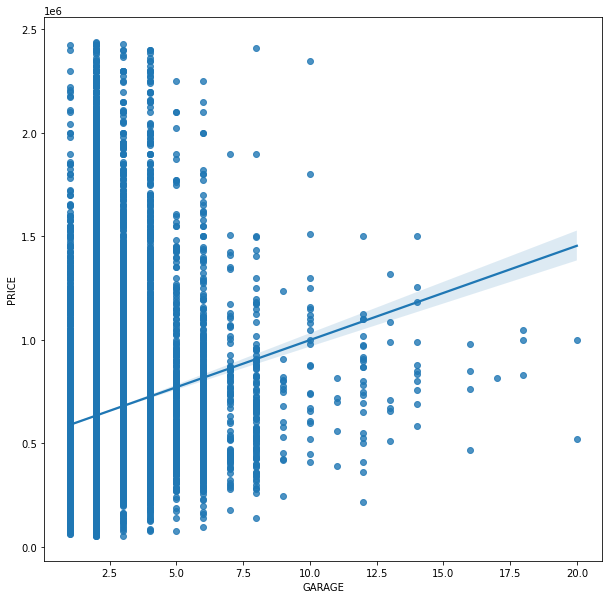

In [36]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['GARAGE'], y=df_housing['PRICE'])

#### CBD_DIST column

<AxesSubplot:xlabel='CBD_DIST', ylabel='PRICE'>

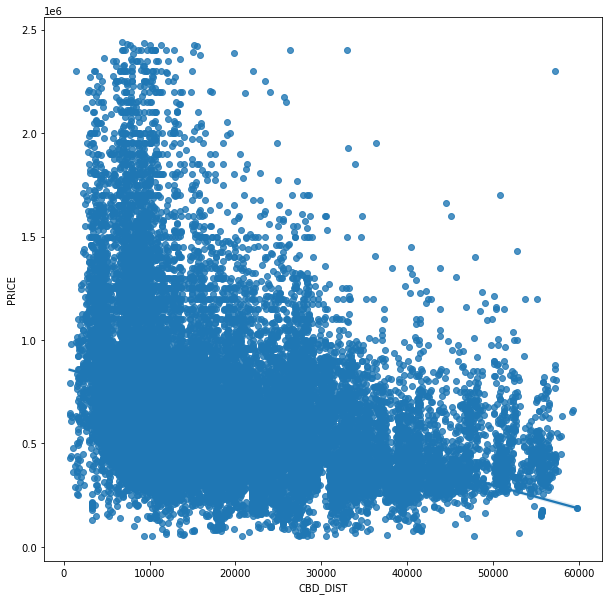

In [37]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['CBD_DIST'], y=df_housing['PRICE'])

#### LAND_AREA column

<AxesSubplot:xlabel='LAND_AREA', ylabel='PRICE'>

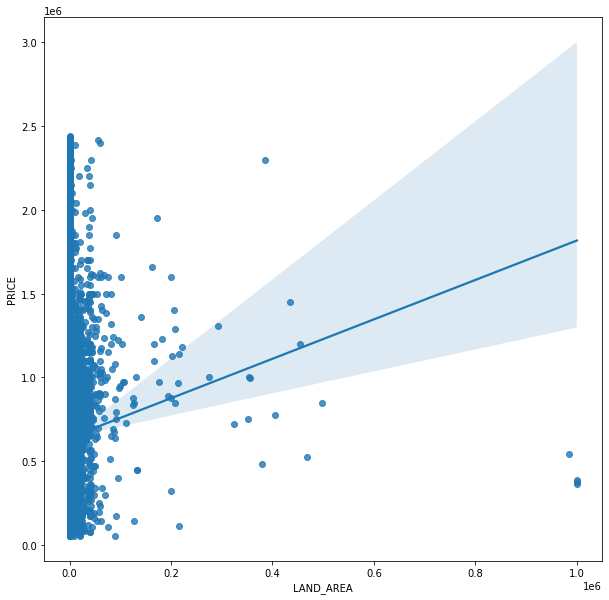

In [38]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['LAND_AREA'], y=df_housing['PRICE'])

In [39]:
df_housing.loc[:, ['LAND_AREA', 'PRICE']].sort_values(by=['LAND_AREA'], ascending=False).head(10)

,LAND_AREA,PRICE
27619,999999,365000
2684,999999,375000
3575,999999,385000
16791,983690,545000
21813,496919,849500
28041,468086,525000
23744,455212,1200000
5897,435187,1450000
25681,405000,775000
29949,384707,2300000


<AxesSubplot:xlabel='LAND_AREA', ylabel='CBD_DIST'>

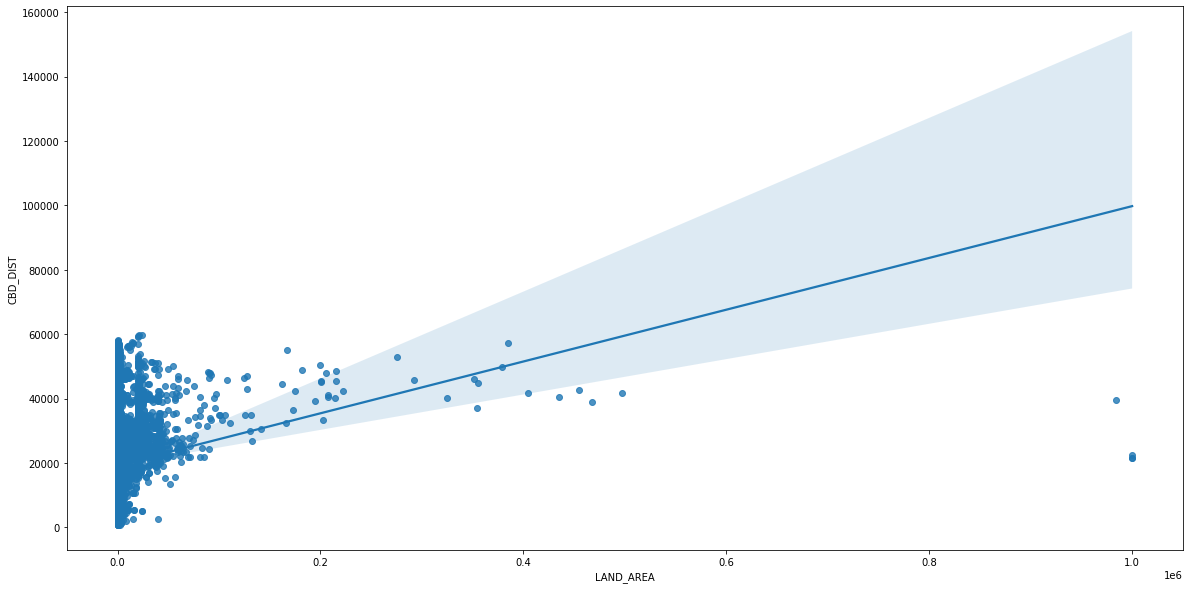

In [40]:
plt.figure(figsize=(20,10))
sns.regplot(x=df_housing['LAND_AREA'], y=df_housing['CBD_DIST'])

<AxesSubplot:xlabel='LAND_AREA', ylabel='PRICE'>

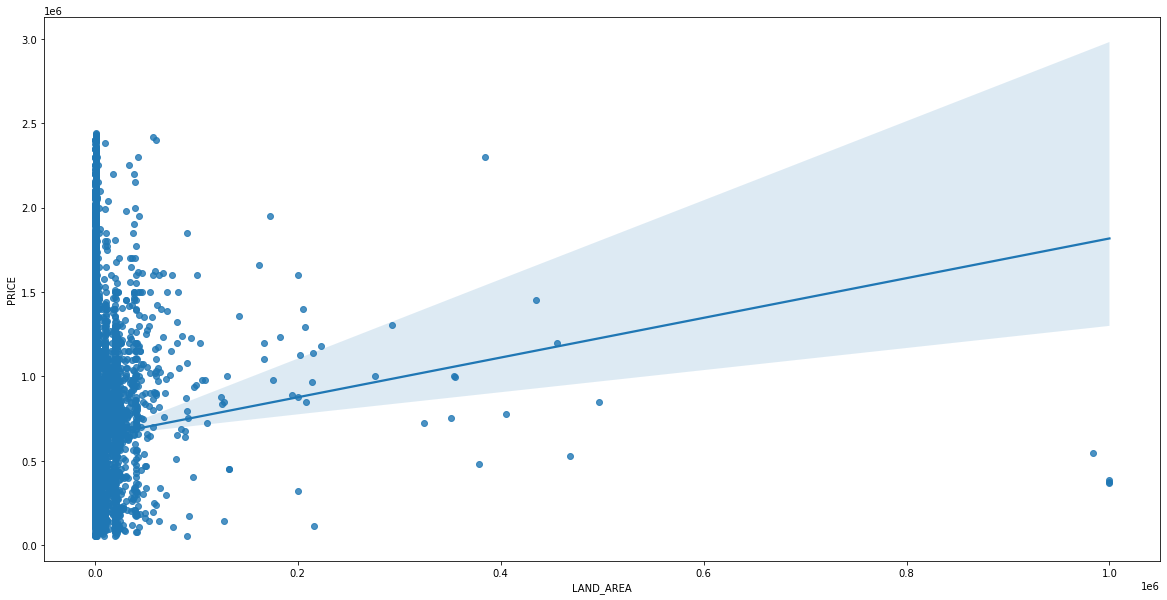

In [41]:
plt.figure(figsize=(20,10))
sns.regplot(x=df_housing['LAND_AREA'], y=df_housing['PRICE'])

<AxesSubplot:xlabel='LAND_AREA', ylabel='PRICE'>

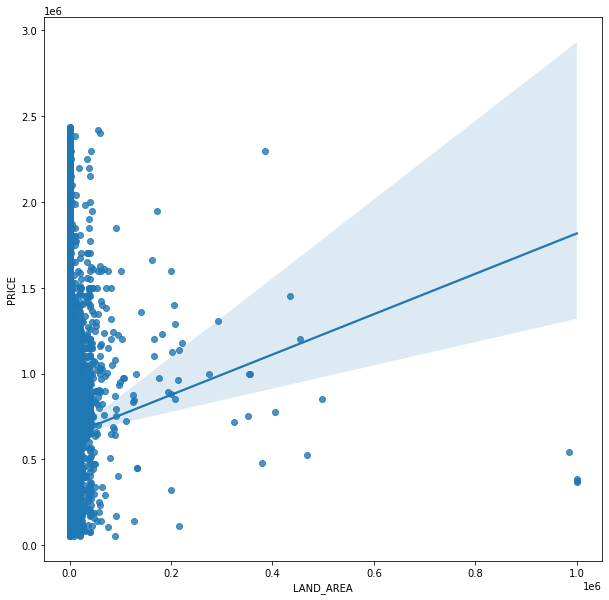

In [42]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['LAND_AREA'], y=df_housing['PRICE'])

In [43]:
## Droping rows with LAND_AREA greater than 0.6 * 1e6
greater_land_area_idx = df_housing[df_housing['LAND_AREA'] > 600000].index
df_housing.drop(greater_land_area_idx, inplace=True)

<AxesSubplot:xlabel='LAND_AREA', ylabel='PRICE'>

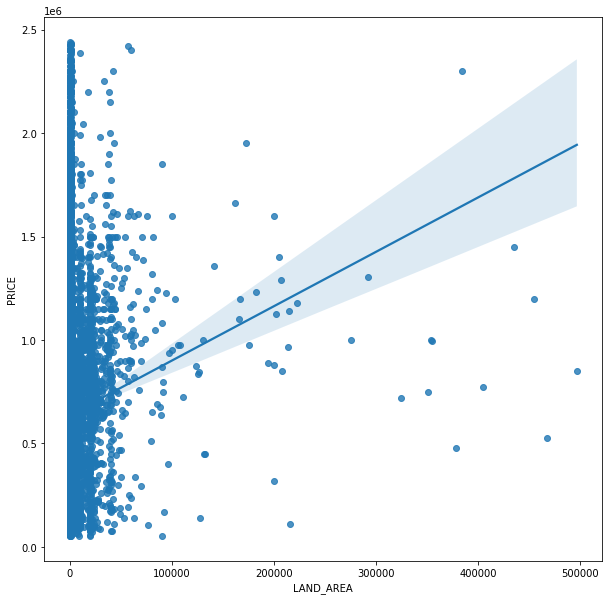

In [44]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['LAND_AREA'], y=df_housing['PRICE'])

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE'>

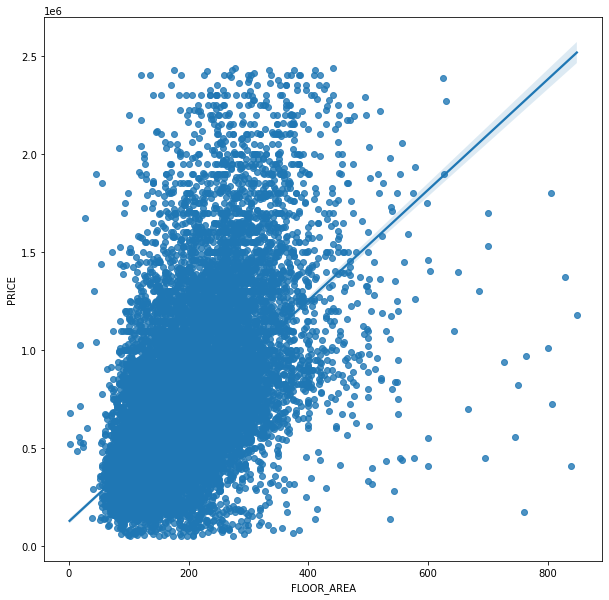

In [45]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['FLOOR_AREA'], y=df_housing['PRICE'])

#### NEAREST_SCH_DIST Column

<AxesSubplot:xlabel='NEAREST_SCH_DIST', ylabel='PRICE'>

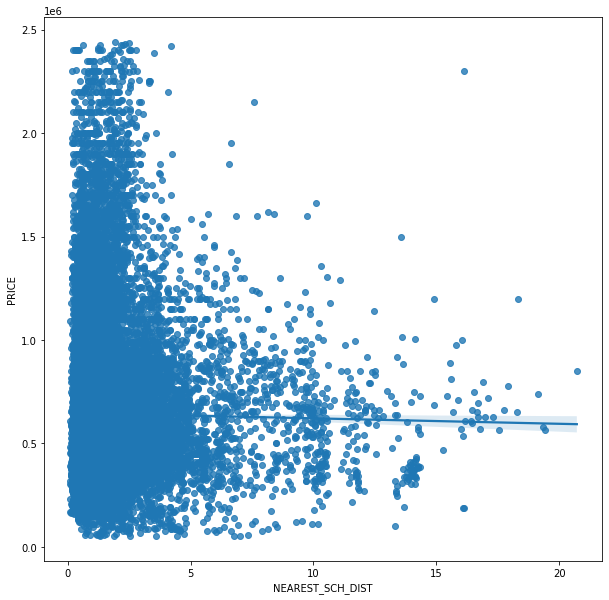

In [46]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['NEAREST_SCH_DIST'], y=df_housing['PRICE'])

#### BUILD_YEAR column

<AxesSubplot:xlabel='BUILD_YEAR', ylabel='PRICE'>

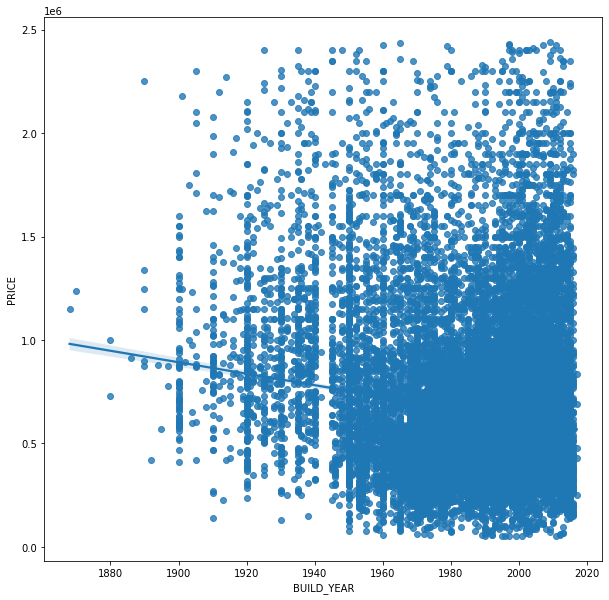

In [47]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['BUILD_YEAR'], y=df_housing['PRICE'])

#### DATE_SOLD column

In [ ]:
df_housing['DATE_SOLD']

In [ ]:
## Converting object type to datetime type
df_housing['DATE_SOLD'] = df_housing['DATE_SOLD'].astype('datetime64[ns]')

In [48]:
df_housing['DATE_SOLD'].dtype

dtype('<M8[ns]')

In [49]:
df_housing['DATE_SOLD'] = df_housing['DATE_SOLD'].astype('int')

/tmp/ipykernel_4204/4155658118.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_housing['DATE_SOLD'] = df_housing['DATE_SOLD'].astype('int')


<AxesSubplot:xlabel='DATE_SOLD', ylabel='PRICE'>

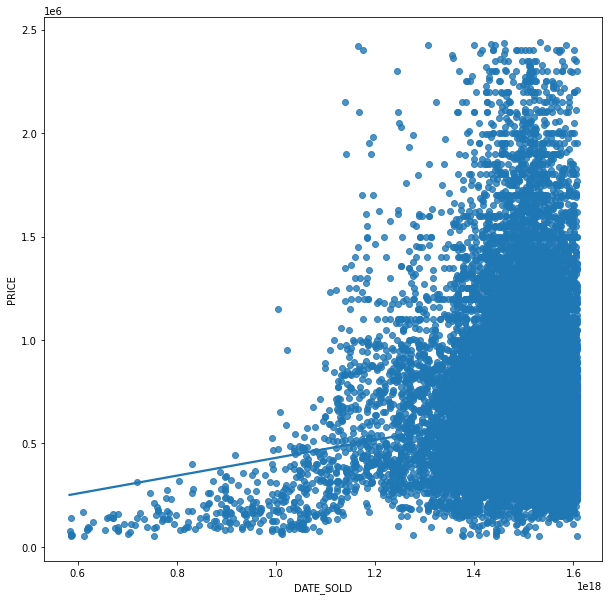

In [50]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['DATE_SOLD'], y=df_housing['PRICE'])

#### BATHROOMS column

<AxesSubplot:xlabel='BATHROOMS', ylabel='PRICE'>

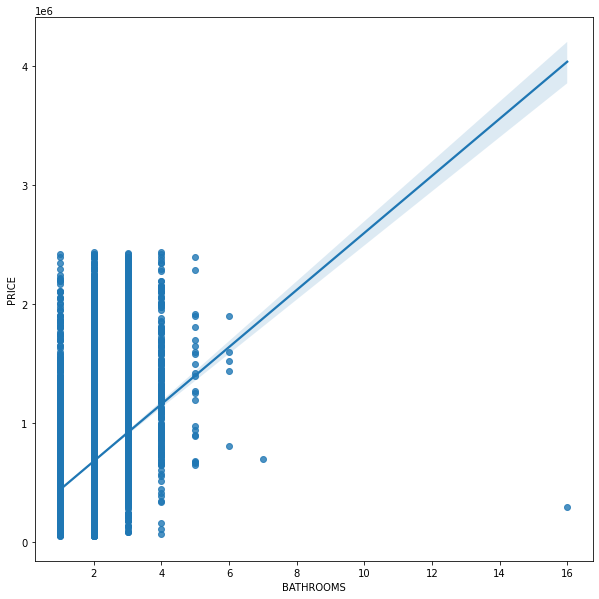

In [51]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['BATHROOMS'], y=df_housing['PRICE'])

In [52]:
greater_bathrooms_idx = df_housing[df_housing['BATHROOMS'] > 8].index
df_housing.drop(greater_bathrooms_idx, inplace=True)

<AxesSubplot:xlabel='BATHROOMS', ylabel='PRICE'>

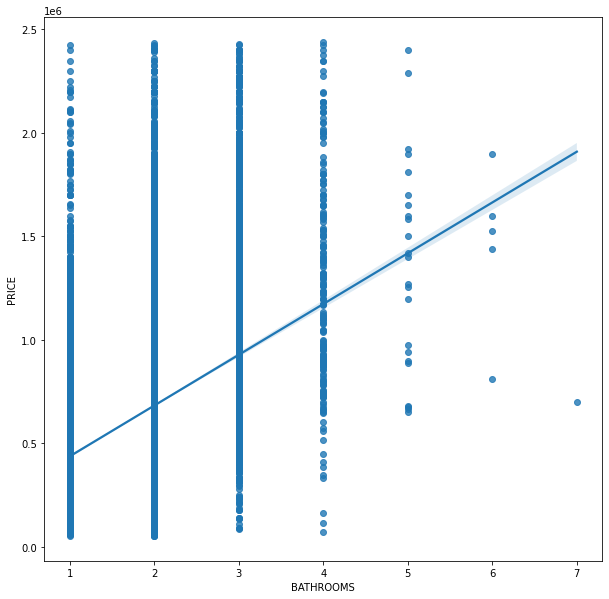

In [53]:
plt.figure(figsize=(10,10))
sns.regplot(x=df_housing['BATHROOMS'], y=df_housing['PRICE'])

### Test Train Split

In [54]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


In [55]:
## Target
y = df_housing['PRICE']

In [56]:
## Droping PRICE column
X = df_housing.drop(['PRICE'], axis=1)

In [57]:
## Divinding data into training and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)

In [59]:
X_train.dtypes

SUBURB               object
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN_DIST      int64
DATE_SOLD             int64
NEAREST_SCH_DIST    float64
dtype: object

In [60]:
object_cols = ['SUBURB']

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# # Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)



/home/anuj/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
OH_X_train.dtypes

BEDROOMS        int64
BATHROOMS       int64
GARAGE        float64
LAND_AREA       int64
FLOOR_AREA      int64
               ...   
312           float64
313           float64
314           float64
315           float64
316           float64
Length: 327, dtype: object

In [63]:
## Checking for columns other than Float and Int
other_cols = [col for col in OH_X_train.columns if OH_X_train[col].dtype not in ['int64', 'float64'] ]

In [64]:
other_cols

[]

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error

In [73]:
def find_mae(model):
    model.fit(OH_X_train, y_train)
    preds = model.predict(OH_X_valid)
    return mean_absolute_error(y_valid, preds)

In [74]:
def find_by_random_forest():
    model_random_forest = RandomForestRegressor(n_estimators=10, random_state=0)
    mae_rf = find_mae(model_random_forest)
    print('random_forest_mae = ', mae_rf)

In [68]:
def find_by_decision_tree():
    model_decision_tree = DecisionTreeRegressor(random_state = 0)
    mae_dt = find_mae(model_decision_tree)
    print('decision_tree_mae = ', mae_dt)

In [75]:
find_by_random_forest()

random_forest_mae =  100620.83998937864


In [76]:
find_by_decision_tree()

decision_tree_mae =  132825.5473535139
